In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('laptops_10.csv', encoding = 'latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


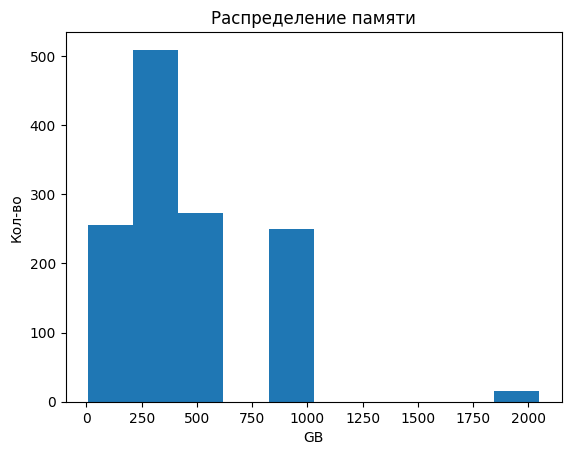

In [3]:
plt.hist(df['Memory_Amount'])
plt.xlabel('GB')
plt.ylabel('Кол-во')
plt.title('Распределение памяти');

2.1 Изучите распределение типов носителя
2.2 Изучите распределение компаний производителей
2.3 Изучите распределение операционной системы
2.4 Изучите распределение компаний производителей CPU

In [7]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

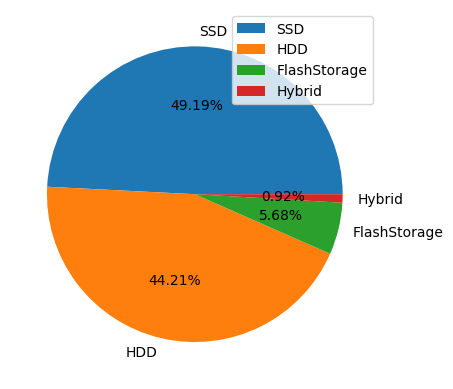

In [17]:
plt.pie(data.values, labels=data.index, autopct='%1.2f%%');
plt.legend(data.index);

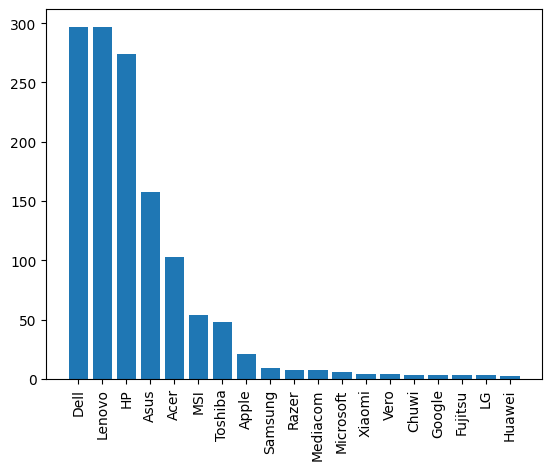

In [23]:
data = df['Company'].value_counts()
plt.bar(data.index, data.values);
plt.xticks(rotation=90);

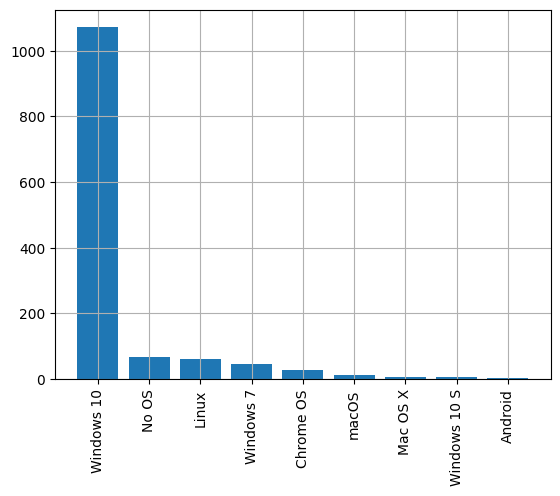

In [28]:
data = df['OpSys'].value_counts()
plt.bar(data.index, data.values);
plt.grid()
plt.xticks(rotation=90);

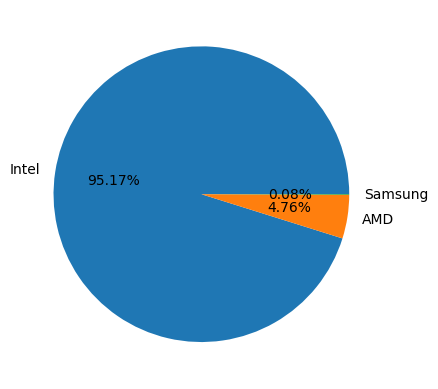

In [34]:
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%');


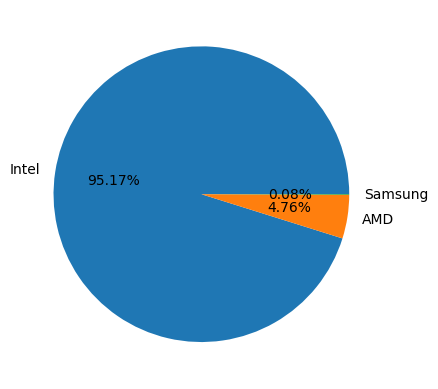

In [35]:
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%');

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах

In [41]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns='Samsung').reset_index()
data


Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


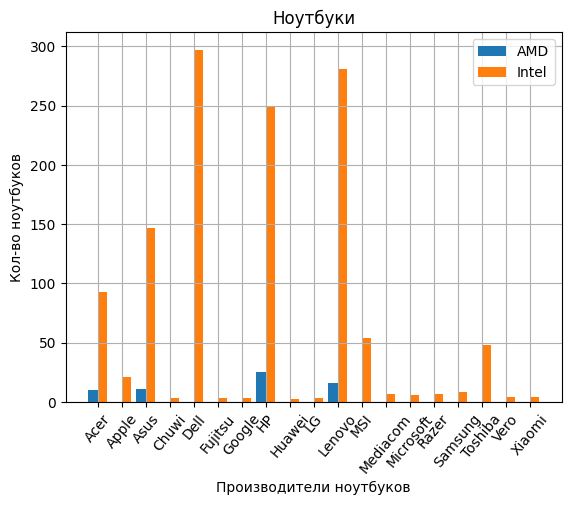

In [47]:
import numpy as np
n_ticks = np.arange(len(data))
plt.bar(n_ticks - 0.2, data['AMD'], width=0.4)
plt.bar(n_ticks + 0.2, data['Intel'], width=0.4)

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50);

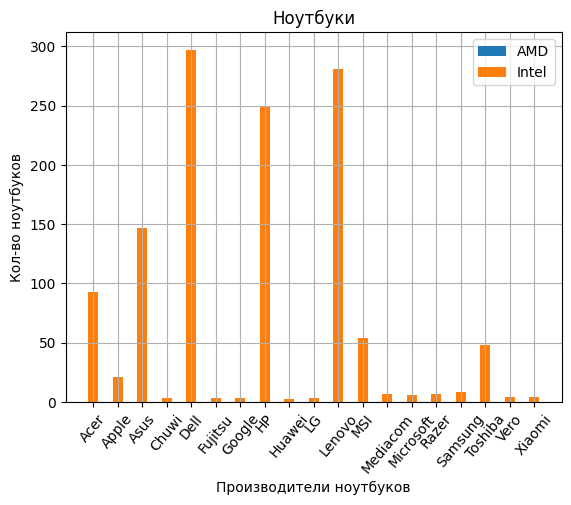

In [49]:
import numpy as np
plt.bar(data['Company'], data['AMD'], width=0.4)
plt.bar(data['Company'], data['Intel'], width=0.4)

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50);

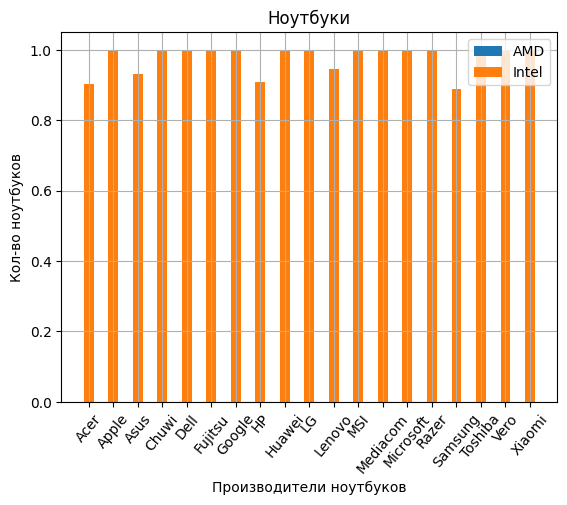

In [51]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns='Samsung').reset_index()
data
plt.bar(data['Company'], data['AMD'], width=0.4)
plt.bar(data['Company'], data['Intel'], width=0.4)

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50);

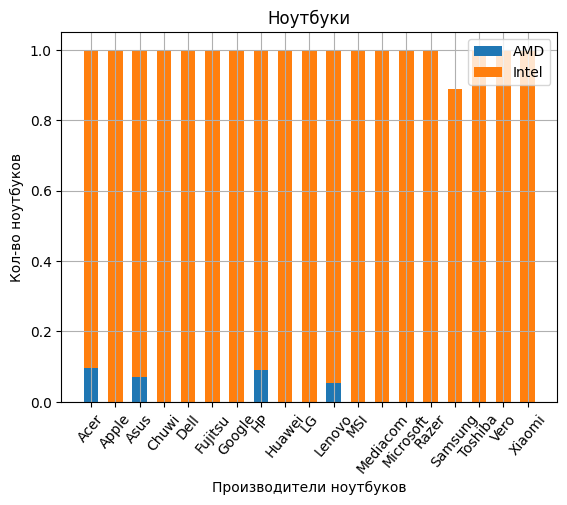

In [52]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()
data


import numpy as np


plt.bar(data['Company'], data['AMD'], width=0.6)
plt.bar(data['Company'], data['Intel'], width=0.6, bottom=data['AMD'])

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(rotation=50);

4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

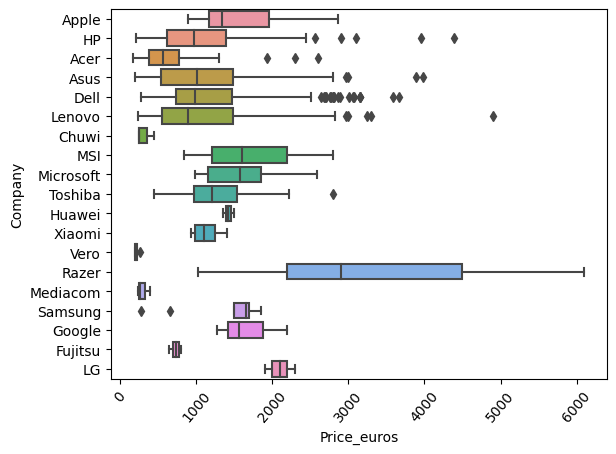

In [3]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Company'])
plt.xticks(rotation=50);

In [2]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], showfliers=False)
plt.xticks(rotation=50);

NameError: name 'sns' is not defined

In [3]:
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers=False)
plt.xticks(rotation=50);

NameError: name 'sns' is not defined

Постройте матрицу корреляций для таблицы)

In [9]:
import numpy as np
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix
sns.heatmap(corr_matrix, annot=True, linewidths=.5)

C:\Users\User\AppData\Local\Temp\ipykernel_2756\1801615628.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


NameError: name 'sns' is not defined